In [1]:
import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('olistbr/brazilian-ecommerce',
path='./data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce


In [2]:
import pandas as pd

customers = pd.read_csv(r"data/olist_customers_dataset.csv")
geolocation = pd.read_csv(r"data/olist_geolocation_dataset.csv")
order_items = pd.read_csv(r"data/olist_order_items_dataset.csv")
order_payments = pd.read_csv(r"data/olist_order_payments_dataset.csv")
order_reviews = pd.read_csv(r"data/olist_order_reviews_dataset.csv")
orders = pd.read_csv(r"data/olist_orders_dataset.csv")
products = pd.read_csv(r"data/olist_products_dataset.csv")
sellers = pd.read_csv(r"data/olist_sellers_dataset.csv")
category_translation = pd.read_csv(r"data/product_category_name_translation.csv")


In [3]:
# Merge customers with orders
df = orders.merge(customers, on="customer_id", how="left")

# Merge order payments
df = df.merge(order_payments, on="order_id", how="left")

# Merge order reviews
df = df.merge(order_reviews, on="order_id", how="left")

# Merge order items
df = df.merge(order_items, on="order_id", how="left")

# Merge products
df = df.merge(products, on="product_id", how="left")

# Merge product category translations
df = df.merge(category_translation, on="product_category_name", how="left")

# # Merge sellers
df = df.merge(sellers, on="seller_id", how="left")

# # Merge geolocation using customer and seller zip codes
# df = df.merge(geolocation, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="left", suffixes=("_customer", "_geo"))
# df = df.merge(geolocation, left_on="seller_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="left", suffixes=("_geo", "_seller"))


In [4]:
pd.set_option('display.max_columns', None) 

In [5]:
df.shape

(119143, 40)

In [6]:
df.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                           997
review_score                        997
review_comment_title             105154
review_comment_message            68898
review_creation_date                997
review_answer_timestamp             997
order_item_id                       833
product_id                          833
seller_id                           833


In [7]:
df.drop(columns=["review_comment_title", "review_comment_message", "review_creation_date", "review_answer_timestamp"],inplace=True)
df.shape


(119143, 36)

In [8]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 177
order_delivered_carrier_date     2086
order_delivered_customer_date    3421
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_id                         997
review_score                      997
order_item_id                     833
product_id                        833
seller_id                         833
shipping_limit_date               833
price                             833
freight_value                     833
product_category_name            2542
product_name_lenght              2542
product_desc

In [9]:
df['review_score'] = df['review_score'].fillna(df['review_score'].mean().round(1))


In [10]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 177
order_delivered_carrier_date     2086
order_delivered_customer_date    3421
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_id                         997
review_score                        0
order_item_id                     833
product_id                        833
seller_id                         833
shipping_limit_date               833
price                             833
freight_value                     833
product_category_name            2542
product_name_lenght              2542
product_desc

In [11]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,14840.0,guariba,SP


In [12]:
df['order_delivered_carrier_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 119143 entries, 0 to 119142
Series name: order_delivered_carrier_date
Non-Null Count   Dtype 
--------------   ----- 
117057 non-null  object
dtypes: object(1)
memory usage: 930.9+ KB


In [13]:
df[df['order_delivered_customer_date'].isna()]['order_status'].value_counts()


order_status
shipped        1256
canceled        743
unavailable     652
invoiced        378
processing      376
delivered         8
created           5
approved          3
Name: count, dtype: int64

In [14]:
df['order_status'].value_counts()

order_status
delivered      115723
shipped          1256
canceled          750
unavailable       652
invoiced          378
processing        376
created             5
approved            3
Name: count, dtype: int64

In [15]:
df.head(0)
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state'],
      dtype='object')

In [16]:
df.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP


In [17]:
df['product_category_name_english'].value_counts()

product_category_name_english
bed_bath_table               11988
health_beauty                10032
sports_leisure                9004
furniture_decor               8832
computers_accessories         8150
                             ...  
arts_and_craftmanship           24
la_cuisine                      16
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: count, Length: 71, dtype: int64

In [18]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state'],
      dtype='object')

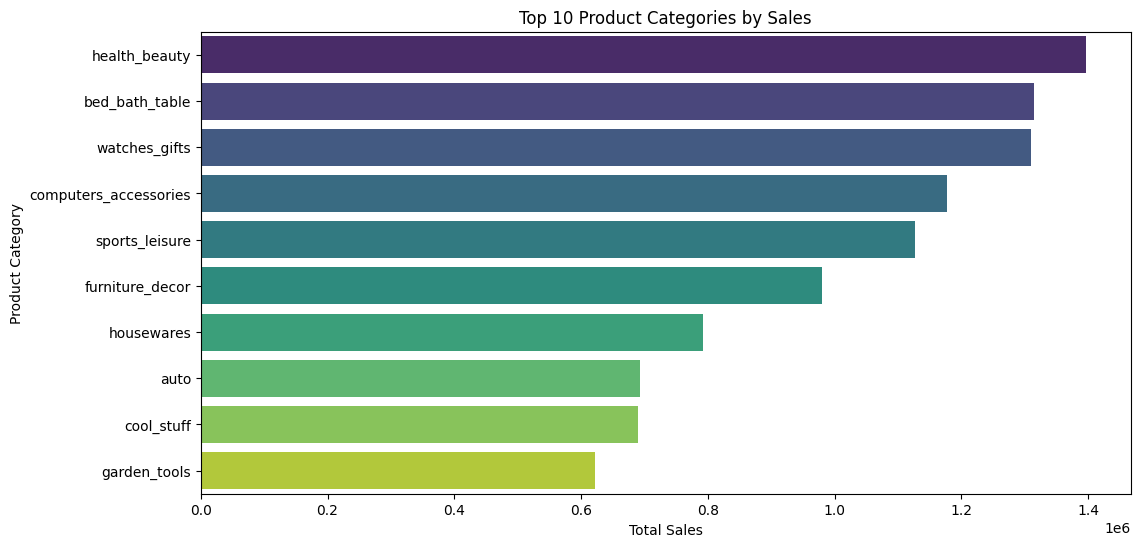

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total sales per product category
df['total_sales'] = df['price'] * df['order_item_id']
category_sales = df.groupby('product_category_name_english')['total_sales'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.values, y=category_sales.index, hue=category_sales.index, palette="viridis", legend=False)
plt.xlabel("Total Sales")
plt.ylabel("Product Category")
plt.title("Top 10 Product Categories by Sales")
plt.show()


C:\Users\suman\AppData\Local\Temp\ipykernel_5340\503049467.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.index, y=state_sales.values, palette="coolwarm")


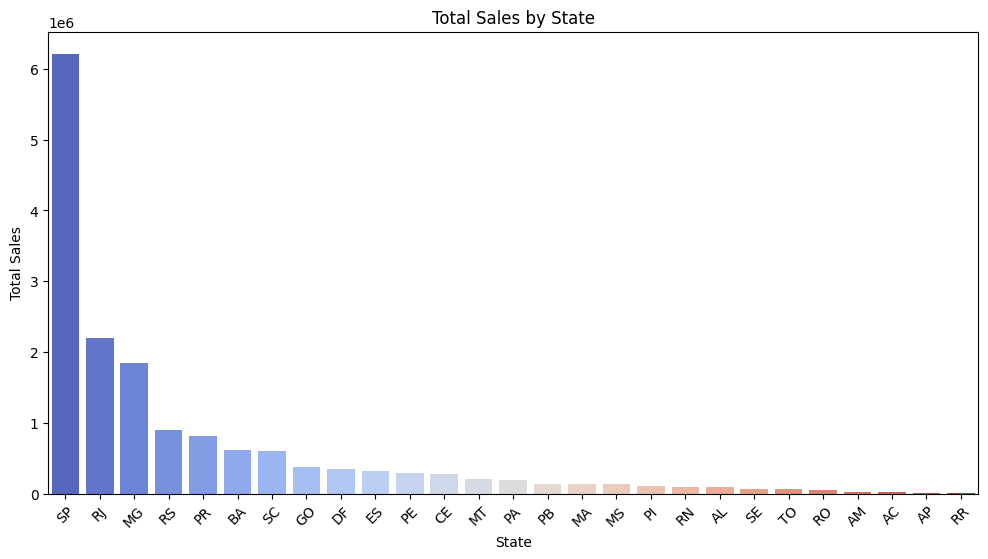

In [20]:
# Calculate total sales per state
state_sales = df.groupby('customer_state')['total_sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=state_sales.index, y=state_sales.values, palette="coolwarm")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.title("Total Sales by State")
plt.xticks(rotation=45)
plt.show()


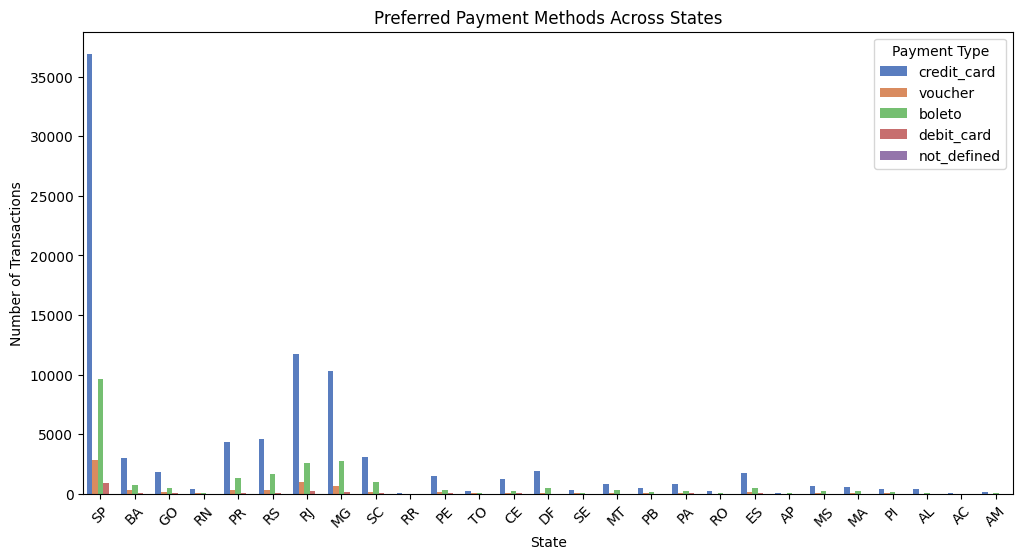

In [21]:
# Count of payment types per state
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='customer_state', hue='payment_type', palette="muted")
plt.xlabel("State")
plt.ylabel("Number of Transactions")
plt.title("Preferred Payment Methods Across States")
plt.xticks(rotation=45)
plt.legend(title="Payment Type")
plt.show()


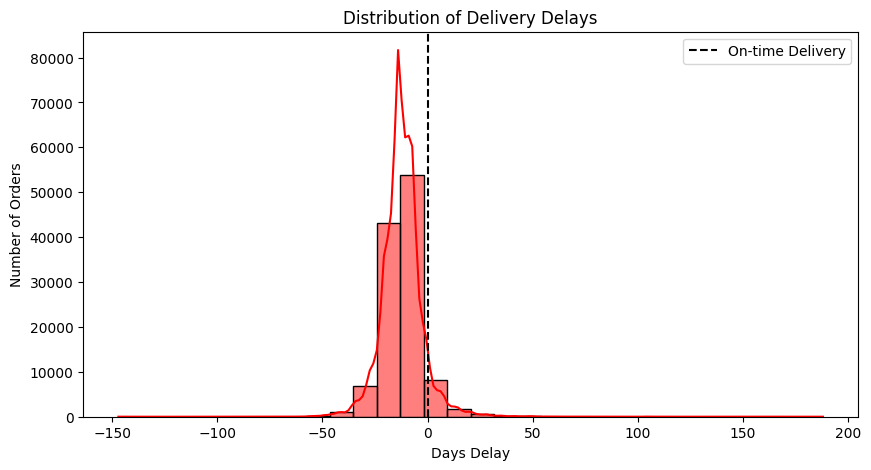

In [22]:
# Convert dates to datetime format
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

# Calculate delivery delay
df['delivery_delay'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

# Plot distribution of delays
plt.figure(figsize=(10, 5))
sns.histplot(df['delivery_delay'].dropna(), bins=30, kde=True, color='red')
plt.axvline(0, color='black', linestyle="--", label="On-time Delivery")
plt.xlabel("Days Delay")
plt.ylabel("Number of Orders")
plt.title("Distribution of Delivery Delays")
plt.legend()
plt.show()


C:\Users\suman\AppData\Local\Temp\ipykernel_5340\2589203676.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='review_score', palette="Blues")


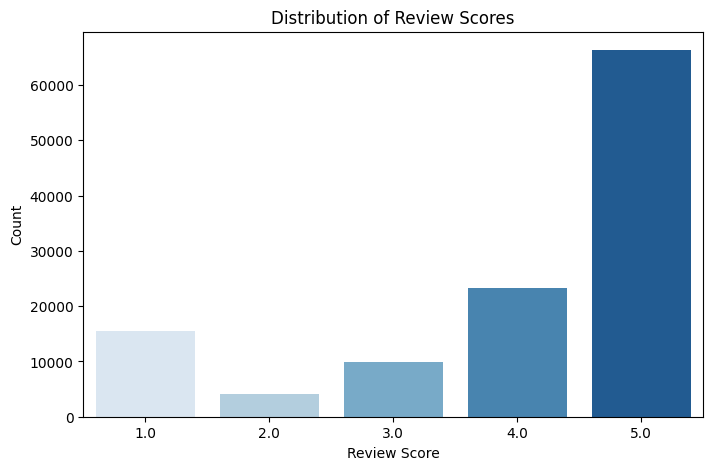

In [23]:
# Count of each review score
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='review_score', palette="Blues")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.title("Distribution of Review Scores")
plt.show()


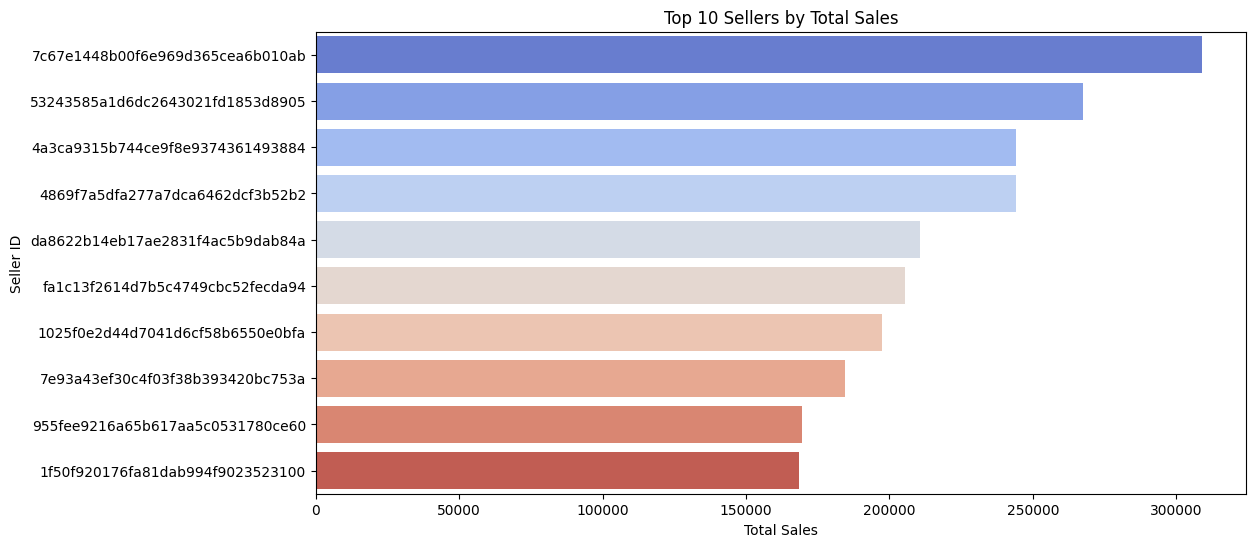

In [24]:
# Calculate total sales per seller
seller_sales = df.groupby('seller_id')['total_sales'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=seller_sales.values, y=seller_sales.index, hue=seller_sales.index, palette="coolwarm", legend=False)
plt.xlabel("Total Sales")
plt.ylabel("Seller ID")
plt.title("Top 10 Sellers by Total Sales")
plt.show()


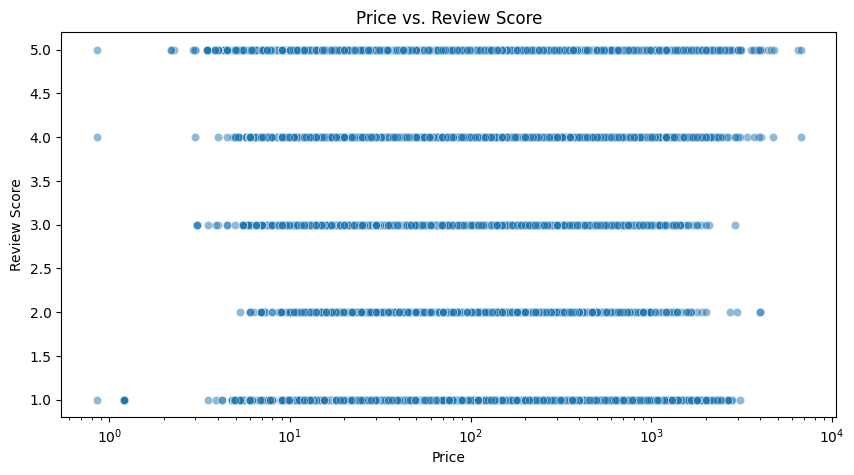

In [25]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['price'], y=df['review_score'], alpha=0.5)
plt.xlabel("Price")
plt.ylabel("Review Score")
plt.title("Price vs. Review Score")
plt.xscale('log')  # Log scale to handle large price differences
plt.show()


C:\Users\suman\AppData\Local\Temp\ipykernel_5340\59328135.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='customer_state', y='payment_installments', data=df, palette="pastel")


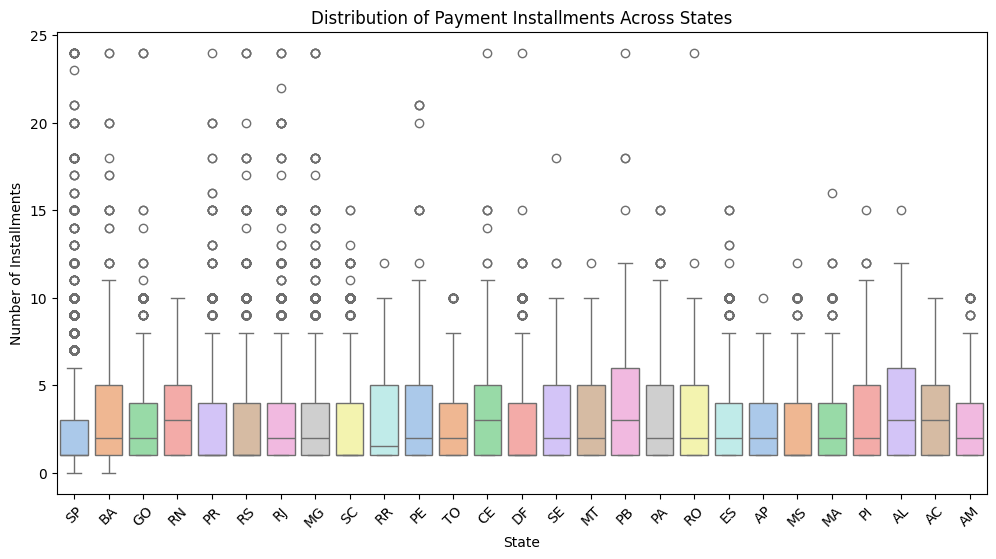

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='customer_state', y='payment_installments', data=df, palette="pastel")
plt.xlabel("State")
plt.ylabel("Number of Installments")
plt.title("Distribution of Payment Installments Across States")
plt.xticks(rotation=45)
plt.show()


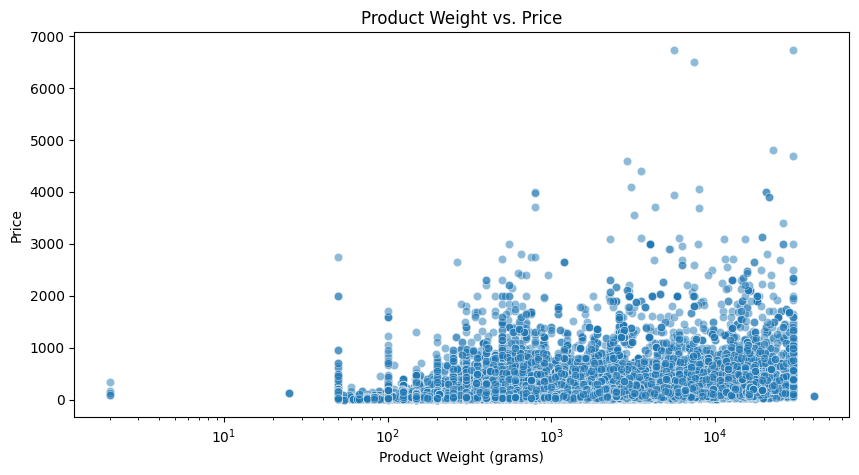

In [27]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['product_weight_g'], y=df['price'], alpha=0.5)
plt.xlabel("Product Weight (grams)")
plt.ylabel("Price")
plt.title("Product Weight vs. Price")
plt.xscale('log')
plt.show()


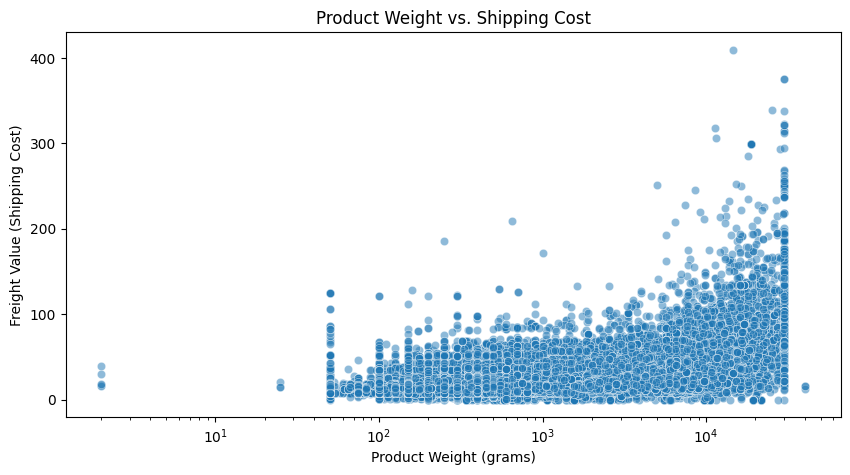

In [28]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['product_weight_g'], y=df['freight_value'], alpha=0.5)
plt.xlabel("Product Weight (grams)")
plt.ylabel("Freight Value (Shipping Cost)")
plt.title("Product Weight vs. Shipping Cost")
plt.xscale('log')
plt.show()


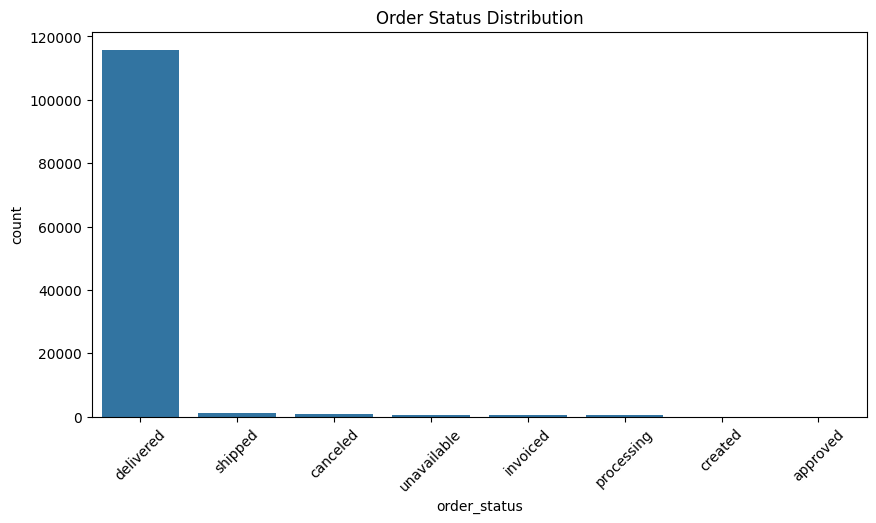

In [29]:
# 1. Order Status Distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x='order_status', data=df, order=df['order_status'].value_counts().index)
plt.title('Order Status Distribution')
plt.xticks(rotation=45)
plt.show()


C:\Users\suman\AppData\Local\Temp\ipykernel_5340\1305343450.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_type', data=df, order=df['payment_type'].value_counts().index, palette='coolwarm')


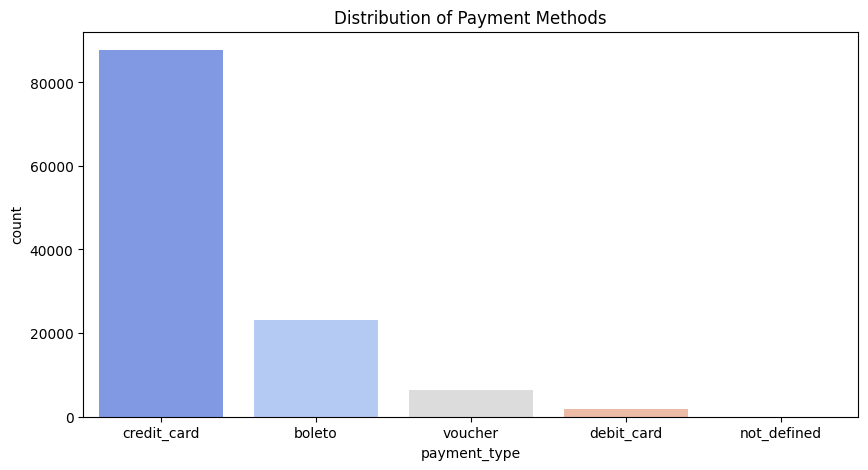

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(x='payment_type', data=df, order=df['payment_type'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Payment Methods')
plt.show()


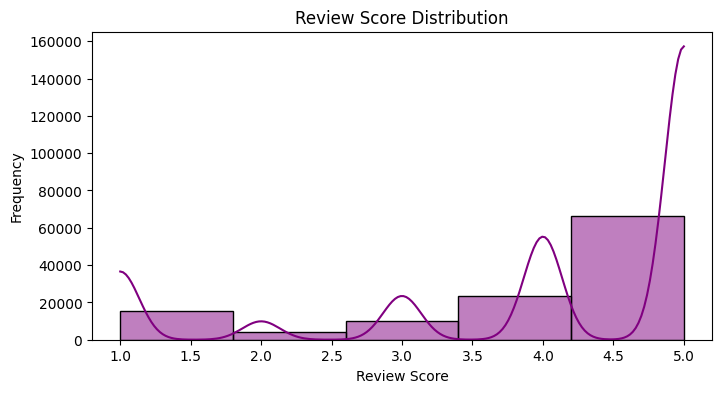

In [31]:
plt.figure(figsize=(8, 4))
sns.histplot(df['review_score'], bins=5, kde=True, color='purple')
plt.title('Review Score Distribution')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()


C:\Users\suman\AppData\Local\Temp\ipykernel_5340\226704655.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['order_month'].astype(str), palette='viridis')


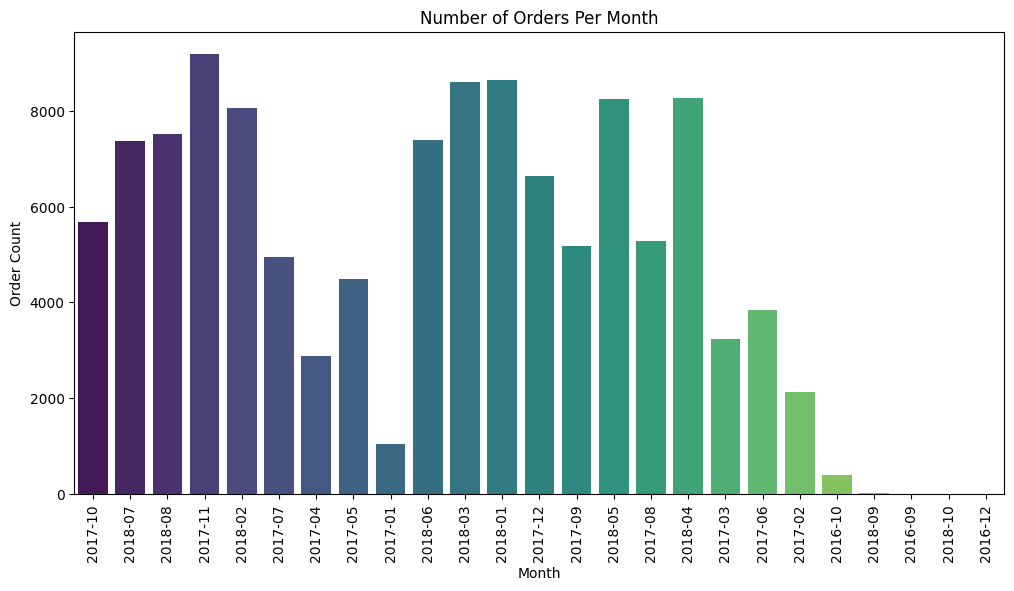

In [32]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')

plt.figure(figsize=(12, 6))
sns.countplot(x=df['order_month'].astype(str), palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Orders Per Month')
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.show()


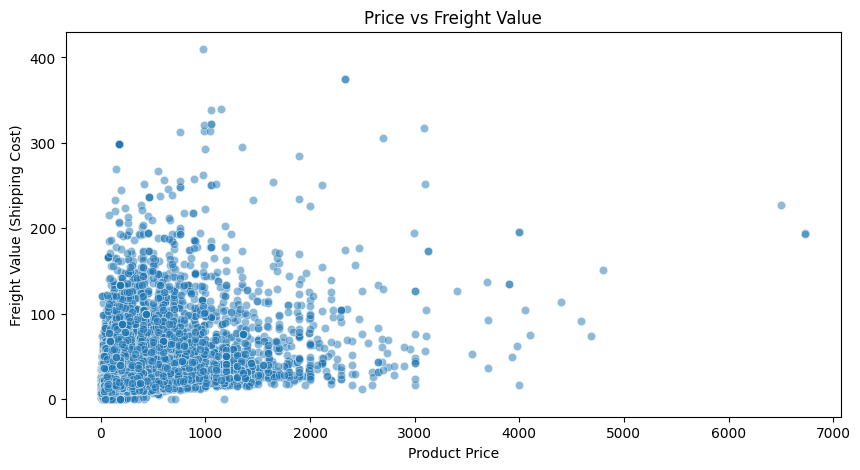

In [33]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='price', y='freight_value', data=df, alpha=0.5)
plt.title('Price vs Freight Value')
plt.xlabel('Product Price')
plt.ylabel('Freight Value (Shipping Cost)')
plt.show()


C:\Users\suman\AppData\Local\Temp\ipykernel_5340\1950333061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='product_category_name_english', data=df, order=df['product_category_name_english'].value_counts().index[:10], palette='coolwarm')


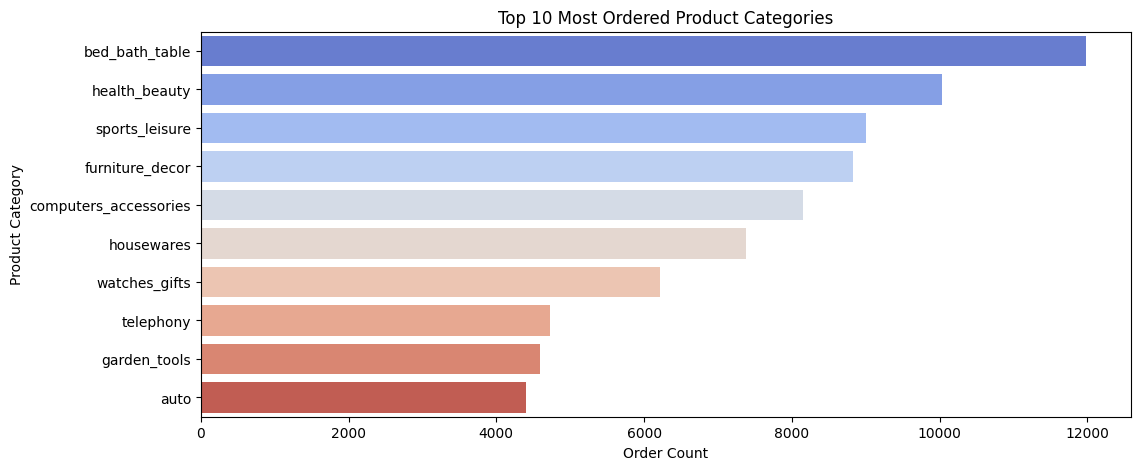

In [34]:
plt.figure(figsize=(12, 5))
sns.countplot(y='product_category_name_english', data=df, order=df['product_category_name_english'].value_counts().index[:10], palette='coolwarm')
plt.title('Top 10 Most Ordered Product Categories')
plt.ylabel('Product Category')
plt.xlabel('Order Count')
plt.show()


C:\Users\suman\AppData\Local\Temp\ipykernel_5340\901468581.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_type', y='review_score', data=df, estimator=lambda x: x.mean(), palette='coolwarm')


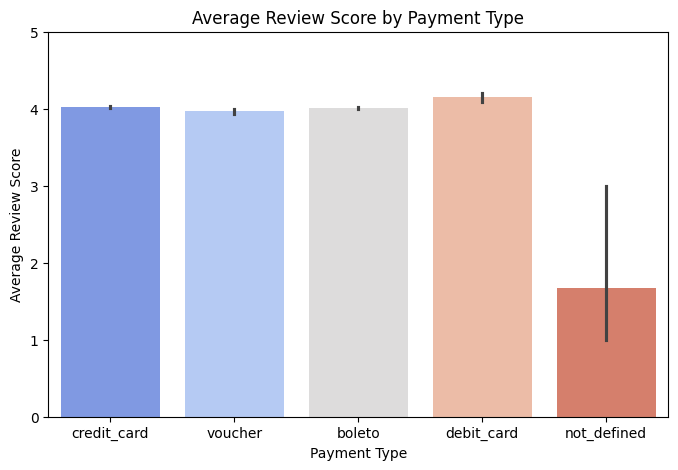

In [35]:
plt.figure(figsize=(8, 5))
sns.barplot(x='payment_type', y='review_score', data=df, estimator=lambda x: x.mean(), palette='coolwarm')
plt.title('Average Review Score by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Average Review Score')
plt.ylim(0, 5)
plt.show()


C:\Users\suman\AppData\Local\Temp\ipykernel_5340\3990988322.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state', y='delivery_time', data=df, estimator=lambda x: x.mean(), palette='magma')


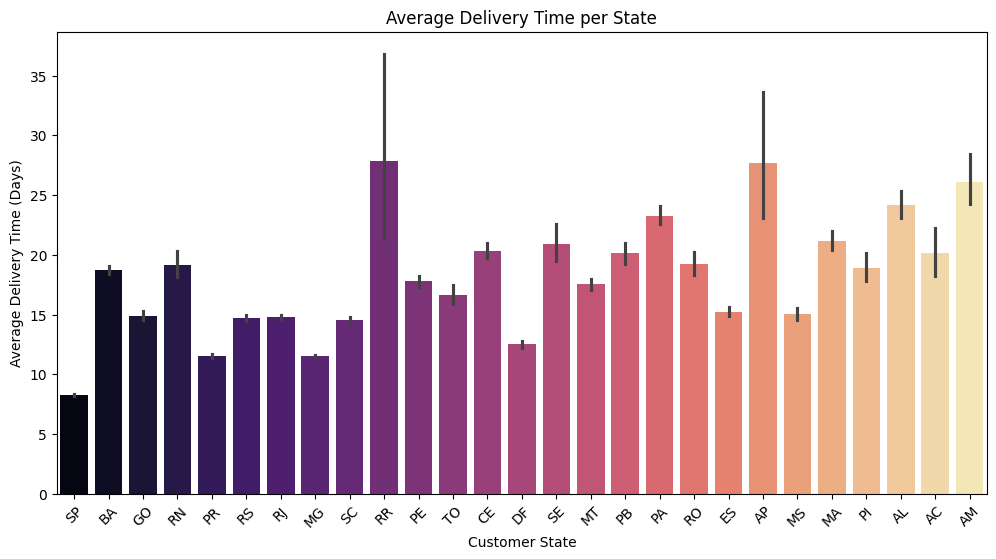

In [36]:
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

plt.figure(figsize=(12, 6))
sns.barplot(x='customer_state', y='delivery_time', data=df, estimator=lambda x: x.mean(), palette='magma')
plt.title('Average Delivery Time per State')
plt.xlabel('Customer State')
plt.ylabel('Average Delivery Time (Days)')
plt.xticks(rotation=45)
plt.show()


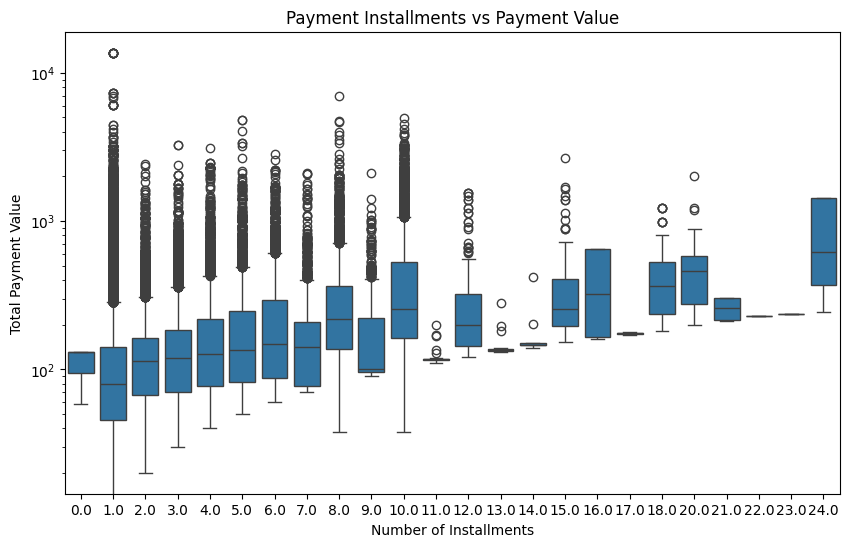

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_installments', y='payment_value', data=df)
plt.title('Payment Installments vs Payment Value')
plt.xlabel('Number of Installments')
plt.ylabel('Total Payment Value')
plt.yscale('log')
plt.show()


C:\Users\suman\AppData\Local\Temp\ipykernel_5340\1161296850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state', y='price', data=df, estimator=lambda x: x.mean(), palette='coolwarm')


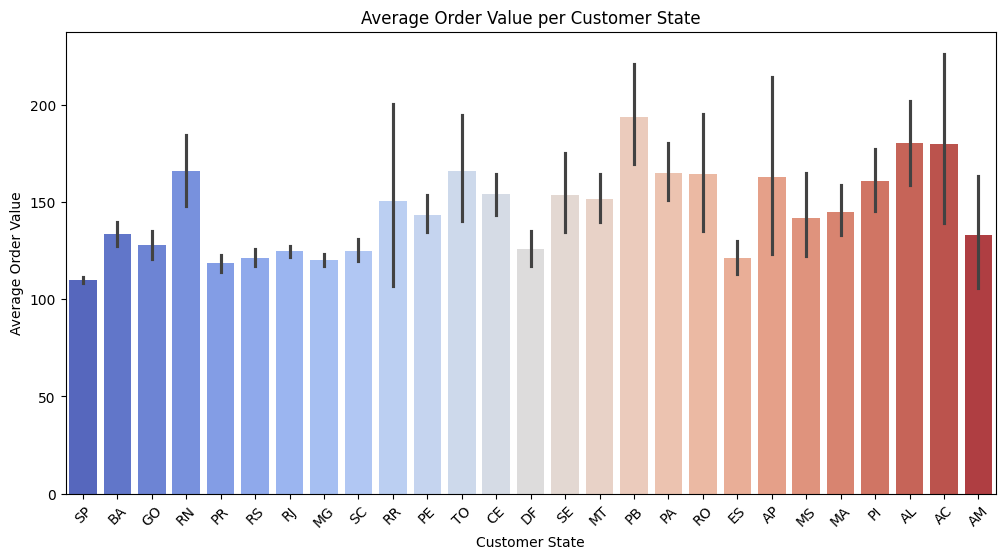

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_state', y='price', data=df, estimator=lambda x: x.mean(), palette='coolwarm')
plt.title('Average Order Value per Customer State')
plt.xlabel('Customer State')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.show()


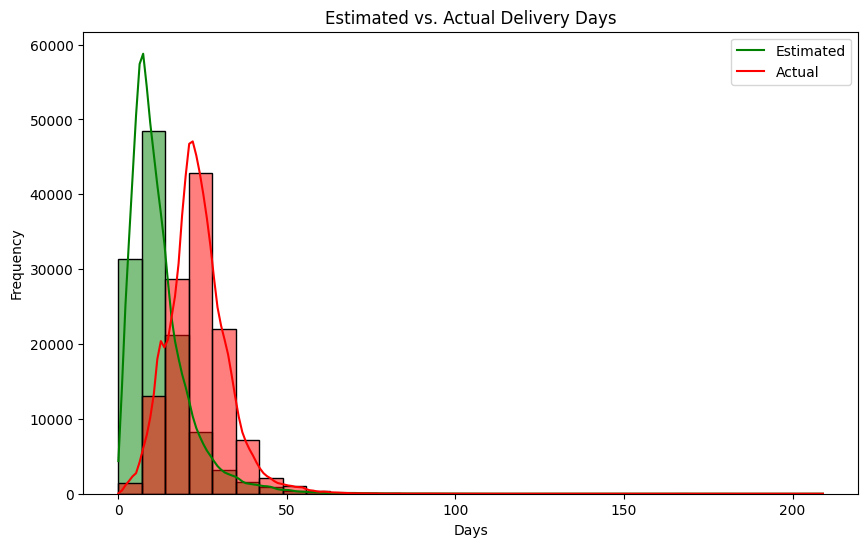

In [39]:
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

df['estimated_delivery_days'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days
df['actual_delivery_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(df[['estimated_delivery_days', 'actual_delivery_days']], kde=True, bins=30, palette=['red', 'green'])
plt.title('Estimated vs. Actual Delivery Days')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.legend(['Estimated', 'Actual'])
plt.show()


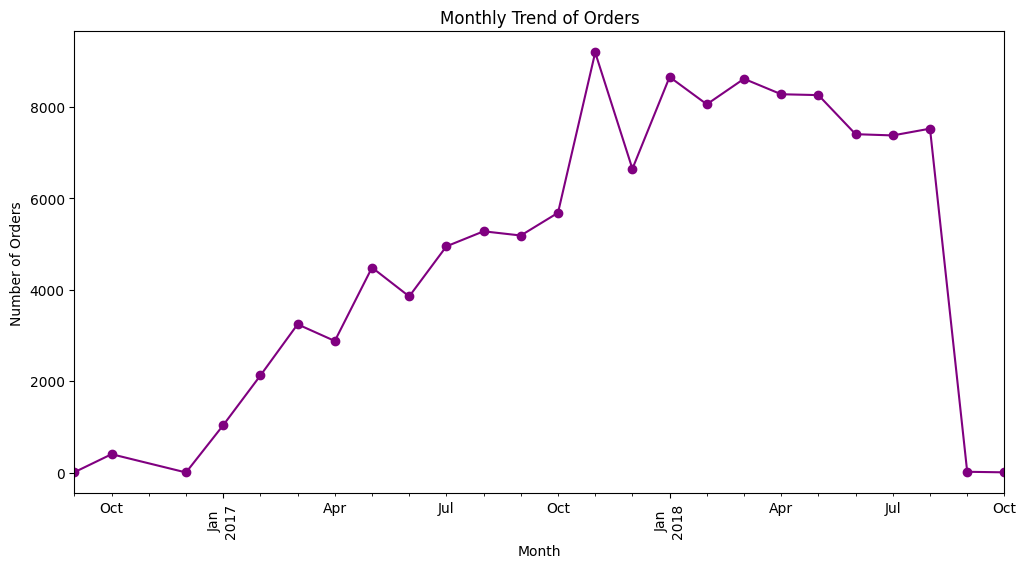

In [40]:
monthly_orders = df.groupby(df['order_purchase_timestamp'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
monthly_orders.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Trend of Orders')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()


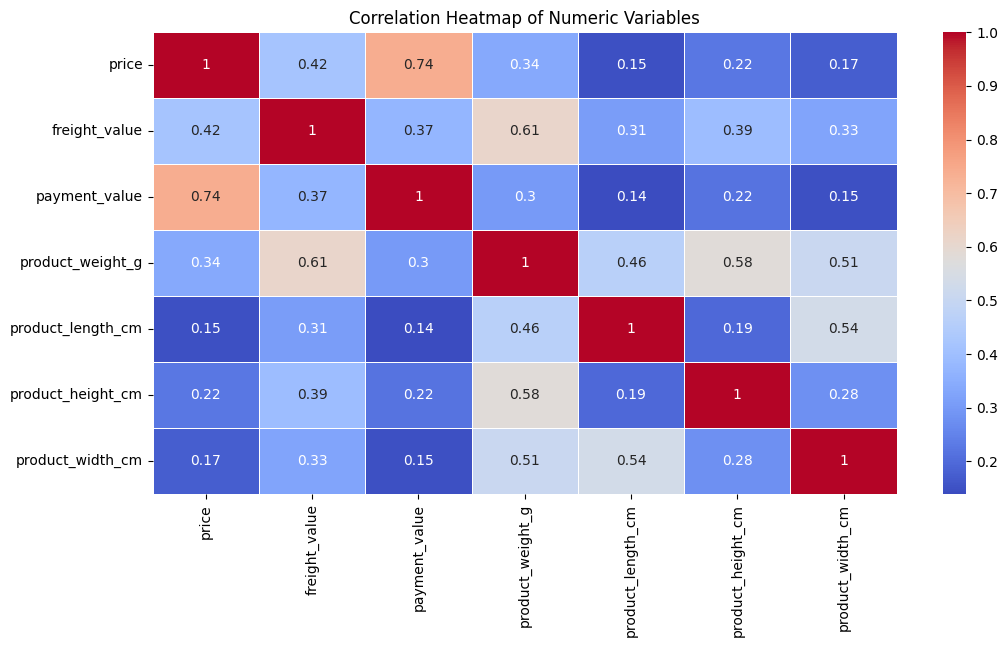

In [41]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[['price', 'freight_value', 'payment_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


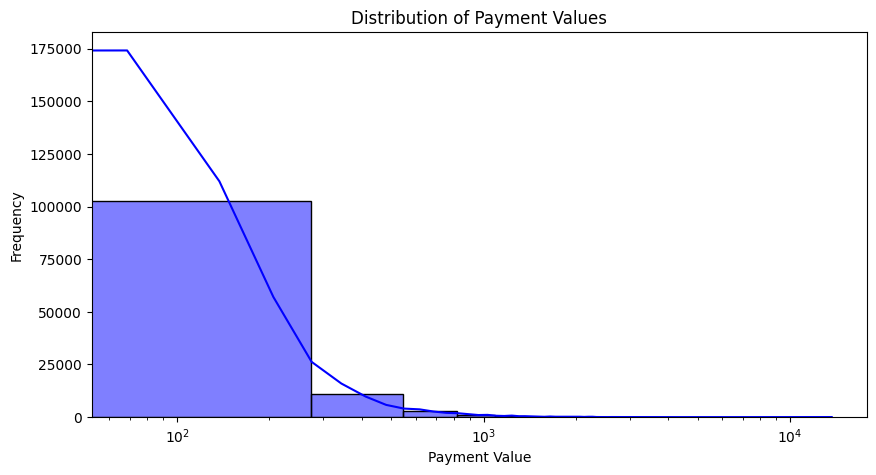

In [42]:
plt.figure(figsize=(10, 5))
sns.histplot(df['payment_value'], bins=50, kde=True, color='blue')
plt.title('Distribution of Payment Values')
plt.xlabel('Payment Value')
plt.ylabel('Frequency')
plt.xscale('log')  # Log scale to handle skewness
plt.show()


C:\Users\suman\AppData\Local\Temp\ipykernel_5340\4053242635.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='magma')


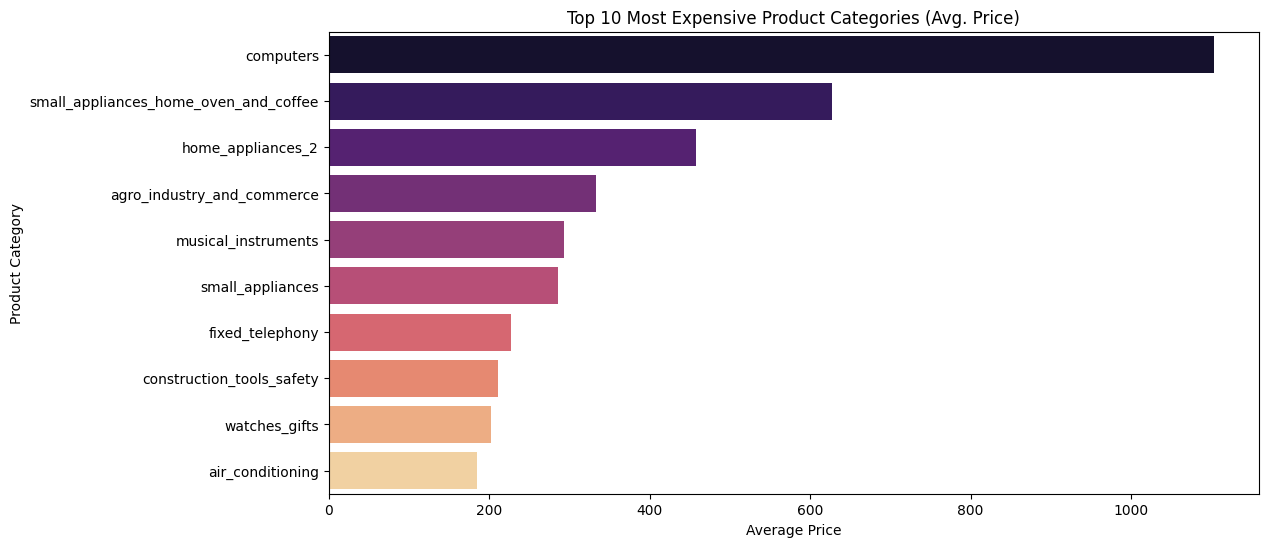

In [43]:
top_categories = df.groupby('product_category_name_english')['price'].mean().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_categories.index, x=top_categories.values, palette='magma')
plt.title('Top 10 Most Expensive Product Categories (Avg. Price)')
plt.xlabel('Average Price')
plt.ylabel('Product Category')
plt.show()


C:\Users\suman\AppData\Local\Temp\ipykernel_5340\3971498934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_score', y='delivery_time', data=df, palette='coolwarm')


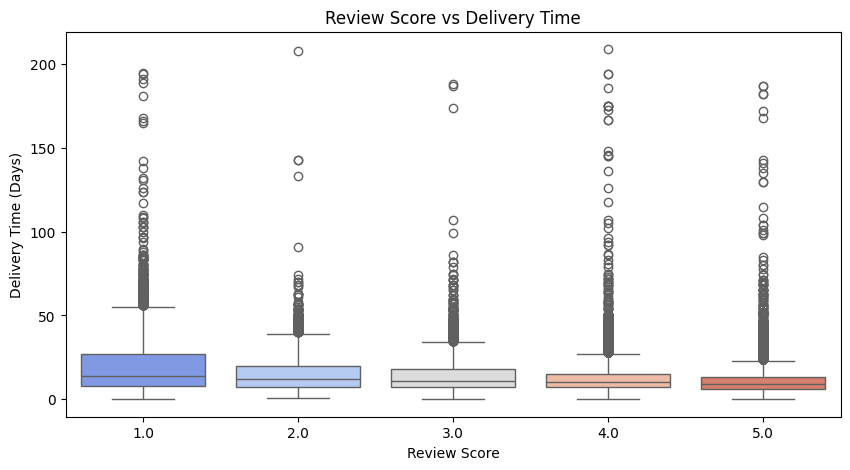

In [44]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='review_score', y='delivery_time', data=df, palette='coolwarm')
plt.title('Review Score vs Delivery Time')
plt.xlabel('Review Score')
plt.ylabel('Delivery Time (Days)')
plt.show()


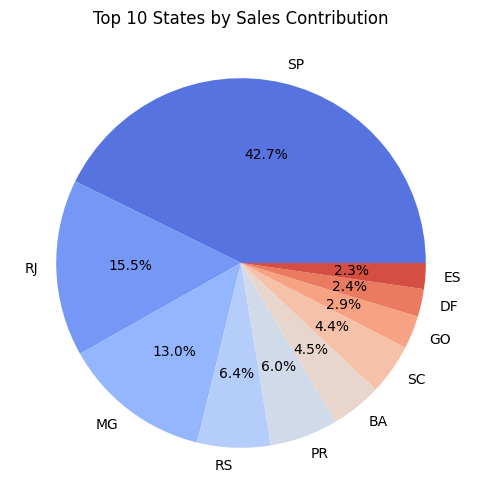

In [45]:
state_sales = df.groupby('customer_state')['payment_value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.pie(state_sales, labels=state_sales.index, autopct='%1.1f%%', colors=sns.color_palette('coolwarm', 10))
plt.title('Top 10 States by Sales Contribution')
plt.show()


C:\Users\suman\AppData\Local\Temp\ipykernel_5340\770285963.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')


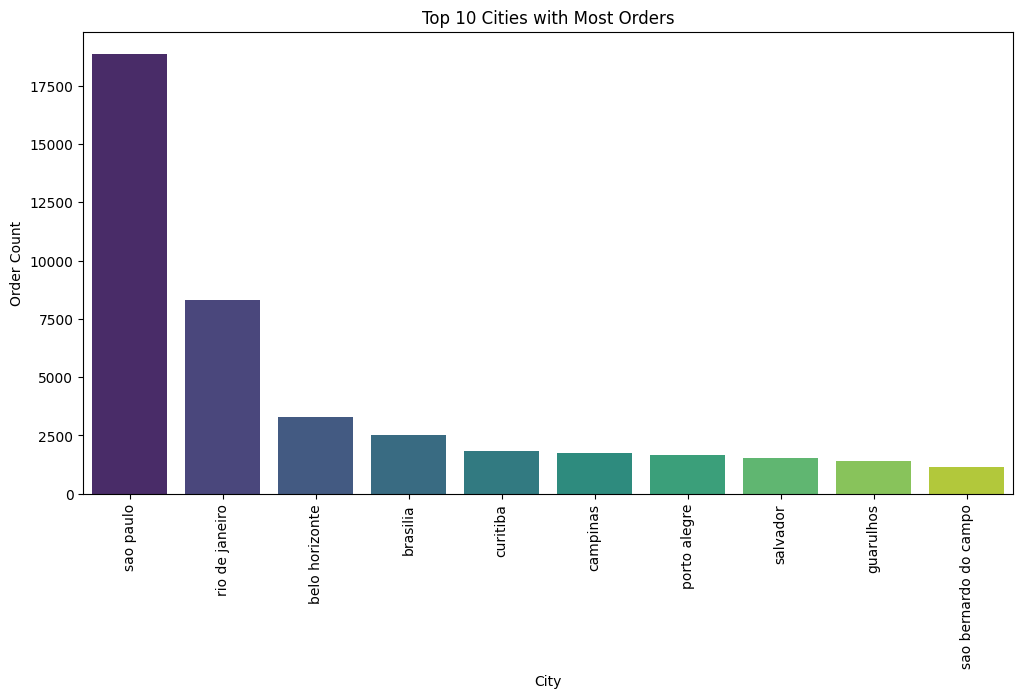

In [46]:
top_cities = df['customer_city'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title('Top 10 Cities with Most Orders')
plt.xlabel('City')
plt.ylabel('Order Count')
plt.xticks(rotation=90)
plt.show()


C:\Users\suman\AppData\Local\Temp\ipykernel_5340\3343338024.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_order_count.index, y=day_order_count.values, palette='coolwarm')


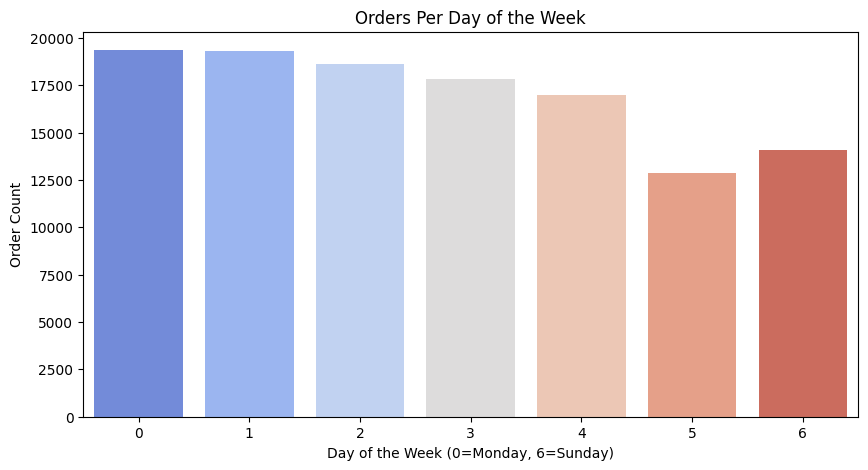

In [47]:
df['order_dayofweek'] = df['order_purchase_timestamp'].dt.dayofweek
day_order_count = df['order_dayofweek'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=day_order_count.index, y=day_order_count.values, palette='coolwarm')
plt.title('Orders Per Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Order Count')
plt.show()


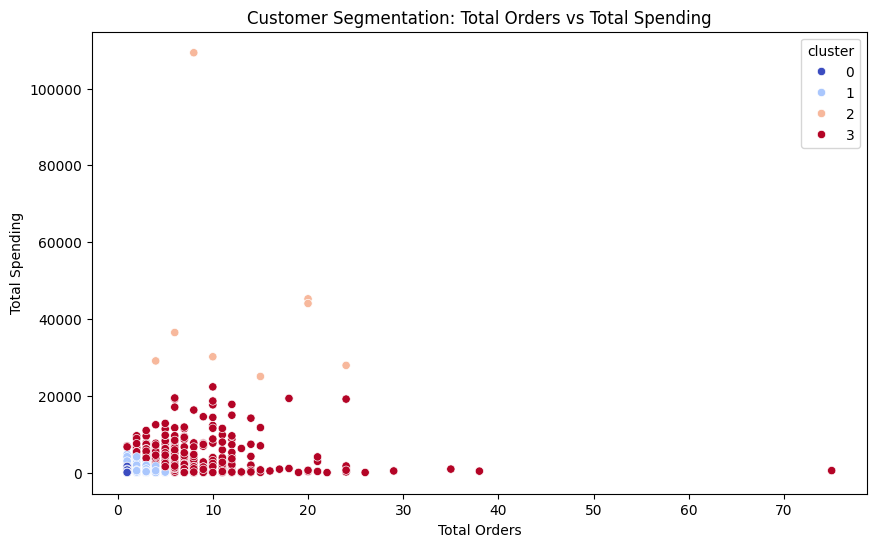

In [48]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Aggregating customer data
customer_data = df.groupby('customer_unique_id').agg({'order_id':'count', 'payment_value':'sum'}).reset_index()
customer_data.columns = ['customer_unique_id', 'total_orders', 'total_spent']

# Scaling the data
scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_data[['total_orders', 'total_spent']])

# Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
customer_data['cluster'] = kmeans.fit_predict(customer_scaled)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_orders', y='total_spent', hue='cluster', data=customer_data, palette='coolwarm')
plt.title('Customer Segmentation: Total Orders vs Total Spending')
plt.xlabel('Total Orders')
plt.ylabel('Total Spending')
plt.show()
